In [1]:
import pandas as pd
import geopandas as gpd #used for transforming geolocation data
import matplotlib.pyplot as plt

from datetime import datetime  #to convert data to datetime that does not fall within the pandas.to_datetime function timeframe
from shapely.geometry import Point  #transform latitude/longitude to geo-coordinate data
from geopandas.tools import geocode #get the latitude/longitude for a given address
from geopandas.tools import reverse_geocode  #get the address for a location using latitude/longitude

%matplotlib inline

In [2]:
#load hurricane data collected from MS Azure
hurr_df = pd.read_csv("datasets/datasets_hurricaneMichael.csv")
hurr_df.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster
0,1,10/06/2018 17:00,18.0,86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 16:50,Beven
1,1A,10/06/2018 20:00,18.3,86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 19:32,Avila
2,2,10/06/2018 23:00,18.8,86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 22:38,Avila
3,2A,10/07/2018 02:00,18.4,87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/07/2018 01:38,Berg
4,3,10/07/2018 05:00,18.6,86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/07/2018 04:53,Berg


In [5]:
type(hurr_df)

pandas.core.frame.DataFrame

In [8]:
hurr_df.isnull().sum()

AdvisoryNumber    0
Date              0
Lat               0
Long              0
Wind              0
Pres              0
Movement          0
Type              0
Name              0
Received          0
Forecaster        0
dtype: int64

In [9]:
hurr_df.columns

Index(['AdvisoryNumber', 'Date', 'Lat', 'Long', 'Wind', 'Pres', 'Movement',
       'Type', 'Name', 'Received', 'Forecaster'],
      dtype='object')

In [10]:
hurr_df['Long'] = 0 - hurr_df['Long']

In [11]:
hurr_df['Long'].head()

0   -86.6
1   -86.6
2   -86.6
3   -87.1
4   -86.9
Name: Long, dtype: float64

In [14]:
#meteor_df['coordinates'] = list(meteor_df[['longitude', 'latitude']].values)
hurr_df['coordinates'] = list(hurr_df[['Long','Lat']].values)

In [15]:
hurr_df['coordinates'].head()

0    [-86.6, 18.0]
1    [-86.6, 18.3]
2    [-86.6, 18.8]
3    [-87.1, 18.4]
4    [-86.9, 18.6]
Name: coordinates, dtype: object

In [17]:
type(hurr_df['coordinates'])

pandas.core.series.Series

In [18]:
type(hurr_df['Date'])

pandas.core.series.Series

In [19]:
hurr_df['coordinates'] = hurr_df['coordinates'].apply(Point)

In [20]:
hurr_df['coordinates'].head()

0      POINT (-86.59999999999999 18)
1    POINT (-86.59999999999999 18.3)
2    POINT (-86.59999999999999 18.8)
3    POINT (-87.09999999999999 18.4)
4    POINT (-86.90000000000001 18.6)
Name: coordinates, dtype: object

In [21]:
type(hurr_df['coordinates'])

pandas.core.series.Series

In [37]:
geo_hurr_df = gpd.GeoDataFrame(hurr_df, geometry = 'coordinates')

In [30]:
US_df = gpd.read_file('datasets/datasets_US_states(5m).json')
US_df.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"(POLYGON ((-88.124658 30.28364, -88.0868119999..."
1,0400000US02,02,Alaska,,570640.950,"(POLYGON ((-166.10574 53.988606, -166.075283 5..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.538593 37.000674, -112.534545 3..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.042964 33.019219, -94.043036 33...."
4,0400000US06,06,California,,155779.220,"(POLYGON ((-122.421439 37.869969, -122.421341 ..."


In [31]:
type(US_df['geometry'])

geopandas.geoseries.GeoSeries

In [35]:
US48_df = US_df.loc[US_df['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico']) == False]
US48_df.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"(POLYGON ((-88.124658 30.28364, -88.0868119999..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.538593 37.000674, -112.534545 3..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.042964 33.019219, -94.043036 33...."
4,0400000US06,06,California,,155779.220,"(POLYGON ((-122.421439 37.869969, -122.421341 ..."
5,0400000US08,08,Colorado,,103641.888,"POLYGON ((-106.190554 40.997607, -106.061181 4..."


In [36]:
US48_df.plot

<bound method GeoDataFrame.plot of          GEO_ID STATE                  NAME LSAD  CENSUSAREA  \
0   0400000US01    01               Alabama        50645.326   
2   0400000US04    04               Arizona       113594.084   
3   0400000US05    05              Arkansas        52035.477   
4   0400000US06    06            California       155779.220   
5   0400000US08    08              Colorado       103641.888   
6   0400000US09    09           Connecticut         4842.355   
7   0400000US10    10              Delaware         1948.543   
8   0400000US11    11  District of Columbia           61.048   
9   0400000US12    12               Florida        53624.759   
10  0400000US13    13               Georgia        57513.485   
12  0400000US16    16                 Idaho        82643.117   
13  0400000US17    17              Illinois        55518.930   
14  0400000US18    18               Indiana        35826.109   
15  0400000US19    19                  Iowa        55857.130   
16  0

In [38]:
geo_hurr_df.plot

<bound method GeoDataFrame.plot of    AdvisoryNumber              Date   Lat  Long  Wind  Pres  \
0               1  10/06/2018 17:00  18.0 -86.6    30  1006   
1              1A  10/06/2018 20:00  18.3 -86.6    30  1004   
2               2  10/06/2018 23:00  18.8 -86.6    30  1004   
3              2A  10/07/2018 02:00  18.4 -87.1    35  1004   
4               3  10/07/2018 05:00  18.6 -86.9    35  1004   
5              3A  10/07/2018 08:00  18.9 -86.8    35  1004   
6               4  10/07/2018 11:00  19.2 -86.9    35  1004   
7              4A  10/07/2018 14:00  19.2 -86.9    40  1004   
8               5  10/07/2018 17:00  19.2 -85.5    50   999   
9              5A  10/07/2018 20:00  19.9 -85.4    60   997   
10              6  10/07/2018 23:00  20.0 -85.4    60   997   
11             6A  10/08/2018 02:00  20.1 -85.5    60   994   
12              7  10/08/2018 05:00  20.6 -85.5    70   983   
13             7A  10/08/2018 08:00  20.9 -85.1    70   982   
14              8  1

Text(0.5, 1.0, "Hurracaine Michael's Paths")

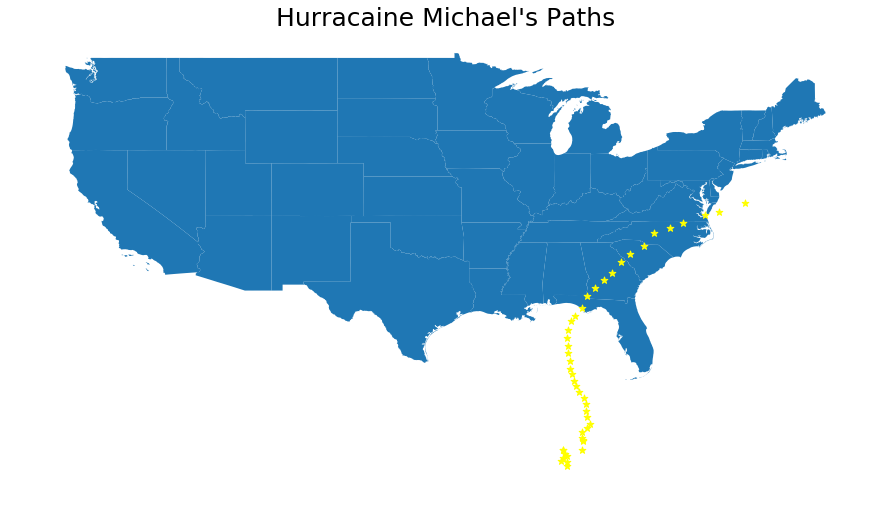

In [46]:
fig, ax = plt.subplots(1, figsize=(15,10))

#this is the map
basemap = US48_df.plot(ax=ax)

#plot coordinates on top of map graph
geo_hurr_df.plot(ax=basemap, color='yellow', marker='*', markersize=50)

#take off axis numbers
ax.axis('off')

#put title on map
#ax.set_title("Hurracaine Landings", fontsize=25, fontweight=3)
ax.set_title("Hurracaine Michael's Paths", fontsize=25, fontweight=3)